# Final Mission

In your final mission in this machine learning journey, you will try to guess how many clusters the data you will be working with has. To do this, you will use several clustering algorithms and heuristics. For now, two things: classes in the data are roughly balanced; you will need the following modules and libraries.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Load the `X_train.csv` file as a `Pandas` dataframe.

In [14]:
X_train = pd.read_csv('X_train.csv')
X_train.head()

,variance,skewness,kurtosis,entropy
0,1.95720,-5.11530,8.61270,-1.42970
1,0.12126,0.22347,-0.47327,0.97024
2,3.99940,0.90427,1.16930,1.68920
3,3.81970,8.99510,-4.38300,-4.03270
4,3.46470,-3.91720,3.97460,0.36119


## K-Means and The Elbow Method

Implement the **elbow method**, using **K.Means**, and make a guess regarding the number of cluster that the data has. Do this in the following cell.

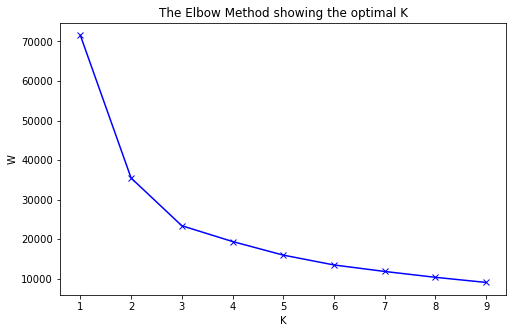

In [15]:
W = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    W.append(kmeans.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, W, 'bx-')
plt.xlabel('K')
plt.ylabel('W')
plt.title('The Elbow Method showing the optimal K')
plt.show()

According to this method, how many clusters do you think you are dealing with? Justify your answer.

**Answer:** 3

## Heriarchical Clustering and The Dendrograms

Use the `AgglomerativeClustering` object to perform a hierarchical clustering using a bottom up approach. Keep in mind that the linkage criteria determines the metric used for the merge strategy:

- **Ward:** It minimizes the sum of squared differences within all clusters. 

- **Maximum or complete linkage:** It minimizes the maximum distance between observations of pairs of clusters.

- **Average linkage:** It minimizes the average of the distances between all observations of pairs of clusters.

- **Single linkage:** It minimizes the distance between the closest observations of pairs of clusters.

Use these four options to plot the four possible dendrograms that you can have. Write the code to do this in the following cell.

In [52]:
links = ['ward', 'complete', 'average', 'single']
HC = {}

for link in links:
    clustering = AgglomerativeClustering(linkage=link).fit(X_train)
    HC[link] = clustering


In [53]:
HC['ward'].labels_

array([0, 0, 0, ..., 0, 0, 0])

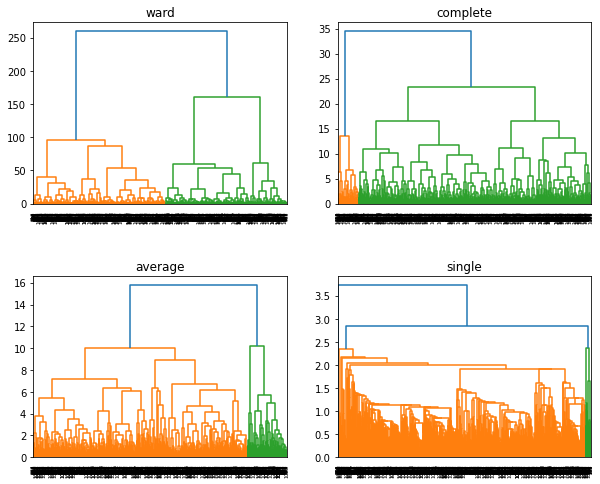

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
n = 4

for n, link in enumerate(links):
    i, j = divmod(n, 2)
    shc.dendrogram(shc.linkage(X_train, method=link), ax=axes[i, j])
    axes[i, j].set_title(link)

plt.show()

By taking a look at the dendrograms, make an educated guess about the number of classes that we have in the data. Justify your answer.

**Answer:**

## Creating the labels

Out of the clustering methods you tried before, pick the one you consider is the best one for creating the labels of the data. Do this in the following cell and store the labels in a variable named `y_train`.

In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

y_train = kmeans.labels_

Now load the `X_test.csv` file as a `Pandas` dataframe.

In [55]:
X_test = pd.read_csv('X_test.csv')
X_test.head()

,variance,skewness,kurtosis,entropy
0,0.64295,7.1018,0.34930,-0.41337
1,2.30660,3.5364,0.57551,0.41938
2,-3.57410,3.9440,-0.07912,-2.12030
3,3.95290,-2.3548,2.37920,0.48274
4,0.74307,11.1700,-1.38240,-4.07280


In the following cell of code repeat the process of creating the labels, but do this for `X_test`. Store these labels in a variable named `y_test`.

In [57]:
kmeans.fit(X_test)
y_test = kmeans.labels_

## Classification

At this point you should have labeled your data, so supervised learning can enter the room. You will train two machine learning models: **logistic regression** and **decision trees**. To do this, you will use the modules from `scikit-learn` known as `LogisticRegression` and `DecissionTreeClassifier`. Both methods can handle either binary or multiple classification, so if you think there are two groups in the data you will be doing binary classification, if you think thre are three or more you will perform multiple classification. For more information on these methods, click on the links below in the **references** section. 

In the following cell, write the code to train the `LogisticRegression` model.

In [59]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

Keep on the training but now with the `DecissionTreeClassifier` model.

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluation

Evaluate the models that you trained in the previous section using a `confusion_matrix` and an `accuracy_score` as evaluation metric. Evaluate first the `LogisticRegression` model.

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
def accuracy(y_test, y_pred):
    
    """
    Write a function that computes the accuracy of your model based on its predictions 
    and the true labels that are stored in y_test.
    """
    cm=confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy=(cm[0,0]+cm[1,1]+cm[2,2])/(np.sum(cm))
    disp=ConfusionMatrixDisplay(cm)
    disp.plot(); plt.show()
    return accuracy

[[104   0   5]
 [ 16 111   0]
 [  0   0  39]]


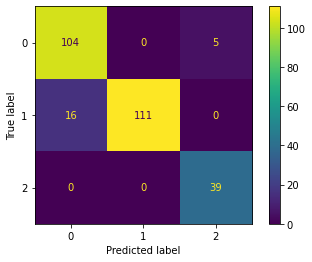

0.9236363636363636

In [90]:
accuracy(y_test, lr_model.predict(X_test))

Same evaluation procedure for the `DecissionTreeClassifier` in the following cell.

[[102   0   7]
 [ 15 112   0]
 [  0   0  39]]


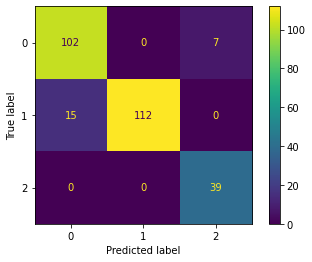

0.92

In [91]:
accuracy(y_test, dt_model.predict(X_test))

## Conclusions

Analyze and interpret the results that were obtained in this section. 

**Final remarks:**

## The End

If you got to this point, congratulations! Did you guess the number of clusters correctly? You will find out soon enough. I hope you enjoyed the course and learned a lot. For now, best of luck and enjoy the holidays. See you around. 

## References

[1] *Hastie, T., Tibshirani, R., Friedman, J. H., "The elements of statistical learning: data mining, inference, and prediction," New York, Springer, 2009.*

[2] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 

[4] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion+matrix#sklearn.metrics.confusion_matrix

[5] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score